In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('dataset.csv')
dataset.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [4]:
dataset.shape

(1067371, 8)

In [5]:
dataset.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [6]:
dataset.dropna(subset=['Customer ID'], inplace=True)

In [7]:
dataset.nunique()

Invoice        44876
StockCode       4646
Description     5299
Quantity         643
InvoiceDate    41439
Price           1022
Customer ID     5942
Country           41
dtype: int64

## data prep

In [8]:
dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'])
dataset['InvoiceDate'] = dataset['InvoiceDate'].dt.date

In [9]:
dataset['Amount'] = dataset['Price'] * dataset['Quantity']

In [10]:
dataset.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0


In [11]:
#cek amount negative


dataset.describe()

,Quantity,Price,Customer ID,Amount
count,824364.000000,824364.000000,824364.000000,824364.000000
mean,12.414574,3.676800,15324.638504,20.195317
std,188.976099,70.241388,1697.464450,308.685001
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,13975.000000,4.250000
50%,5.000000,1.950000,15255.000000,11.250000
75%,12.000000,3.750000,16797.000000,19.500000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [12]:
dataset = dataset[dataset['Quantity']>0]

### Get Value Recency, Freq, Monetary

In [13]:
# Recency : selisih waktu transaksi terakhir per customer dengan tanggal data diambil


max_date = dataset['InvoiceDate'].max()
max_date

datetime.date(2011, 12, 9)

In [14]:
Cust_aggregate = dataset.groupby('Customer ID').agg({'InvoiceDate':'max','Invoice':'count', 'Amount':'sum'}).reset_index()

In [15]:
Cust_aggregate.head()

,Customer ID,InvoiceDate,Invoice,Amount
0,12346.0,2011-01-18,34,77556.46
1,12347.0,2011-12-07,253,5633.32
2,12348.0,2011-09-25,51,2019.40
3,12349.0,2011-11-21,175,4428.69
4,12350.0,2011-02-02,17,334.40


In [16]:
Cust_aggregate['Recency'] = (max_date - Cust_aggregate['InvoiceDate']).dt.days

In [17]:
Cust_aggregate.rename({'Invoice':'Freq','Amount':'Monetary'}, axis=1, inplace=True)

In [18]:
Cust_aggregate.describe()

,Customer ID,Freq,Monetary,Recency
count,5881.000000,5881.000000,5881.000000,5881.000000
mean,15314.674205,136.986907,3017.076888,200.992858
std,1715.429759,353.779018,14734.128619,209.489651
min,12346.000000,1.000000,0.000000,0.000000
25%,13833.000000,21.000000,347.800000,25.000000
50%,15313.000000,53.000000,897.620000,95.000000
75%,16797.000000,142.000000,2304.180000,379.000000
max,18287.000000,12890.000000,608821.650000,738.000000


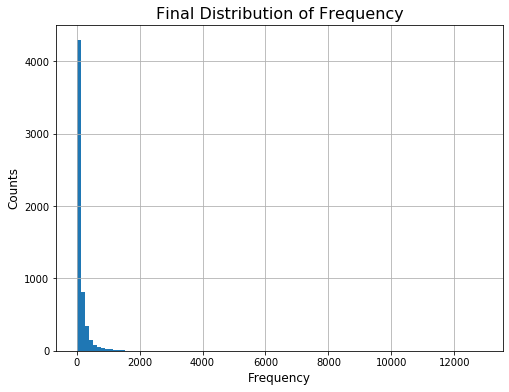

In [19]:
fig, ax = plt.subplots(figsize=(8,6));
Cust_aggregate.Freq.hist(bins=100,ax=ax)
ax.set_title("Final Distribution of Frequency", fontsize=16)
ax.set_xlabel("Frequency", fontsize=12);
ax.set_ylabel("Counts", fontsize=12);

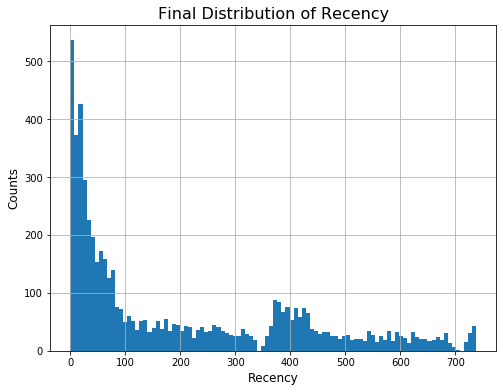

In [20]:
fig, ax = plt.subplots(figsize=(8,6));
Cust_aggregate.Recency.hist(bins=100,ax=ax)
ax.set_title("Final Distribution of Recency", fontsize=16)
ax.set_xlabel("Recency", fontsize=12);
ax.set_ylabel("Counts", fontsize=12);

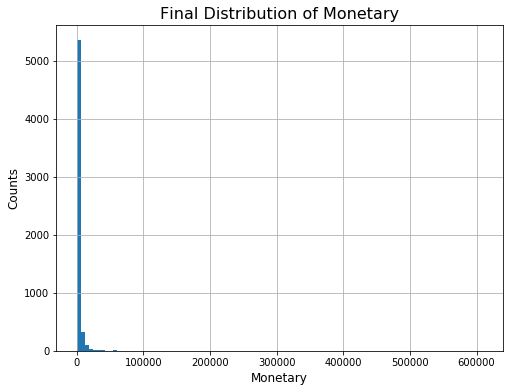

In [21]:
fig, ax = plt.subplots(figsize=(8,6));
Cust_aggregate.Monetary.hist(bins=100,ax=ax)
ax.set_title("Final Distribution of Monetary", fontsize=16)
ax.set_xlabel("Monetary", fontsize=12);
ax.set_ylabel("Counts", fontsize=12);

In [22]:
#RFM - AR
Cust_Age = dataset.groupby('Customer ID')['InvoiceDate'].min().reset_index()
Cust_Age['Age'] = (max_date - Cust_Age['InvoiceDate']).dt.days

In [23]:
Cust_Age.head(2)

,Customer ID,InvoiceDate,Age
0,12346.0,2009-12-14,725
1,12347.0,2010-10-31,404


In [25]:
Cust_return = dataset[['Customer ID','InvoiceDate']].drop_duplicates()
Cust_return = Cust_return.sort_values(by=['Customer ID','InvoiceDate'],axis=0)
Cust_return = Cust_return[['Customer ID','InvoiceDate']].drop_duplicates().set_index('Customer ID').diff()
Cust_return['Nrow'] = Cust_return.groupby('Customer ID').cumcount()+1 

In [26]:
Cust_return

,InvoiceDate,Nrow
Customer ID,,
12346.0,NaN,1
12346.0,"4 days, 0:00:00",2
12346.0,"17 days, 0:00:00",3
12346.0,"10 days, 0:00:00",4
12346.0,"8 days, 0:00:00",5
...,...,...
18287.0,"127 days, 0:00:00",2
18287.0,"62 days, 0:00:00",3
18287.0,"181 days, 0:00:00",4


In [27]:
Cust_return['InvoiceDate'].unique()

array([nan, datetime.timedelta(days=4), datetime.timedelta(days=17), ...,
       datetime.timedelta(days=482), datetime.timedelta(days=547),
       datetime.timedelta(days=411)], dtype=object)

In [28]:
Cust_return = Cust_return.sort_values(by='Customer ID').reset_index()

In [29]:
Cust_return

,Customer ID,InvoiceDate,Nrow
0,12346.0,NaN,1
1,12346.0,"4 days, 0:00:00",2
2,12346.0,"17 days, 0:00:00",3
3,12346.0,"10 days, 0:00:00",4
4,12346.0,"8 days, 0:00:00",5
...,...,...,...
33107,18287.0,"62 days, 0:00:00",3
33108,18287.0,"143 days, 0:00:00",5
33109,18287.0,"-95 days, 0:00:00",1
33110,18287.0,"127 days, 0:00:00",2


In [53]:
Cust_Age_Return

,Customer ID,Invoice Date,Age,Return,Nrow
0,12346.0,2009-12-14,725,NaN,1
1,12346.0,2009-12-14,725,"4 days, 0:00:00",2
2,12346.0,2009-12-14,725,"17 days, 0:00:00",3
3,12346.0,2009-12-14,725,"10 days, 0:00:00",4
4,12346.0,2009-12-14,725,"8 days, 0:00:00",5
...,...,...,...,...,...
33107,18287.0,2010-05-17,571,"62 days, 0:00:00",3
33108,18287.0,2010-05-17,571,"143 days, 0:00:00",5
33109,18287.0,2010-05-17,571,"-95 days, 0:00:00",1
33110,18287.0,2010-05-17,571,"127 days, 0:00:00",2


In [30]:
Cust_Age_Return = pd.merge(Cust_Age, Cust_return, on="Customer ID")
Cust_Age_Return.columns =['Customer ID','Invoice Date', 'Age','Return','Nrow']
Cust_Age_Return.head(2)

,Customer ID,Invoice Date,Age,Return,Nrow
0,12346.0,2009-12-14,725,NaN,1
1,12346.0,2009-12-14,725,"4 days, 0:00:00",2


In [31]:
#merge with data Cust_aggregate
Cust_aggregate = pd.merge(Cust_aggregate, Cust_Age_Return, on="Customer ID", how="left")
Cust_aggregate.isna().sum()

Customer ID     0
InvoiceDate     0
Freq            0
Monetary        0
Recency         0
Invoice Date    0
Age             0
Return          1
Nrow            0
dtype: int64

In [32]:
#remove first transaction except for the only one transaction
Cust_aggregate = Cust_aggregate[((Cust_aggregate['Nrow']!=1) &(Cust_aggregate['Freq']>1))] 

In [33]:
Cust_aggregate['Return'] = Cust_aggregate['Return'].apply(lambda x: x.days)
# Cust_aggregate.drop(['Invoice Date','Nrow'],axis=1, inplace=True)
Cust_aggregate.groupby('Customer ID').agg({'Age':'min','Return':'median'}).reset_index()

,Customer ID,Age,Return
0,12346.0,725,17.0
1,12347.0,404,54.0
2,12348.0,438,75.0
3,12349.0,589,163.0
4,12352.0,392,16.5
...,...,...,...
4184,18281.0,577,397.0
4185,18282.0,126,119.0
4186,18283.0,658,24.0
4187,18286.0,723,247.0


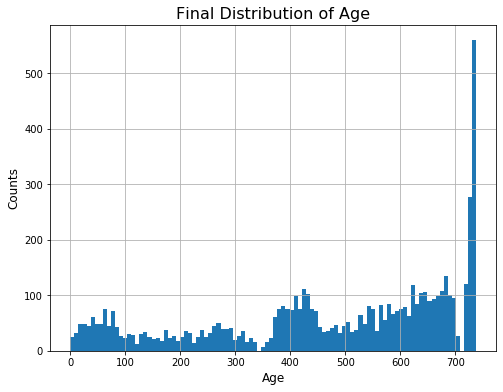

In [34]:
#distribution for Age

fig, ax = plt.subplots(figsize=(8,6));
Cust_Age.Age.hist(bins=100,ax=ax)
ax.set_title("Final Distribution of Age", fontsize=16)
ax.set_xlabel("Age", fontsize=12);
ax.set_ylabel("Counts", fontsize=12);

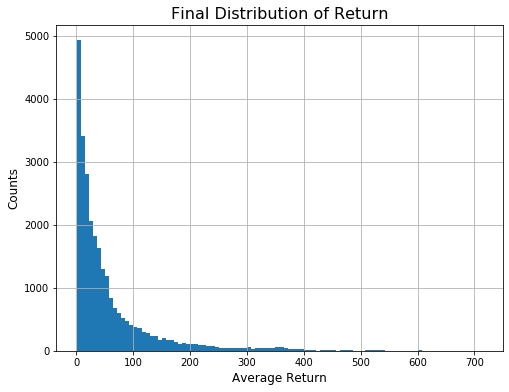

In [35]:
#distribution for Return

fig, ax = plt.subplots(figsize=(8,6));
Cust_aggregate.Return.hist(bins=100,ax=ax)
ax.set_title("Final Distribution of Return", fontsize=16)
ax.set_xlabel("Average Return", fontsize=12);
ax.set_ylabel("Counts", fontsize=12);

In [36]:
Cust_aggregate.head(2)

,Customer ID,InvoiceDate,Freq,Monetary,Recency,Invoice Date,Age,Return,Nrow
1,12346.0,2011-01-18,34,77556.46,325,2009-12-14,725,4,2
2,12346.0,2011-01-18,34,77556.46,325,2009-12-14,725,17,3


### Segmentasi RFM-AR

In [37]:
RFM_scores = Cust_aggregate

In [38]:
RFM_scores['R']    = pd.qcut(RFM_scores['Recency'], 3, labels=[3, 2, 1])
RFM_scores['F']    = pd.qcut(RFM_scores['Freq'], 3, labels=[1, 2, 3])
RFM_scores['M']    = pd.qcut(RFM_scores['Monetary'], 3, labels=[1, 2, 3])
RFM_scores['A']    = pd.qcut(RFM_scores['Age'], 3, labels=[1, 2, 3])
RFM_scores['Re']    = pd.qcut(RFM_scores['Return'].rank(method='first'), 3, labels=[3, 2, 1])

In [39]:
RFM_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27231 entries, 1 to 33111
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Customer ID   27231 non-null  float64 
 1   InvoiceDate   27231 non-null  object  
 2   Freq          27231 non-null  int64   
 3   Monetary      27231 non-null  float64 
 4   Recency       27231 non-null  int64   
 5   Invoice Date  27231 non-null  object  
 6   Age           27231 non-null  int64   
 7   Return        27231 non-null  int64   
 8   Nrow          27231 non-null  int64   
 9   R             27231 non-null  category
 10  F             27231 non-null  category
 11  M             27231 non-null  category
 12  A             27231 non-null  category
 13  Re            27231 non-null  category
dtypes: category(5), float64(2), int64(5), object(2)
memory usage: 2.2+ MB


In [40]:
RFM_scores[['R','Freq','Monetary','Recency']].groupby('R').describe()

Freq                                                                \
    count         mean          std  min    25%    50%     75%      max   
R                                                                         
3  9814.0  1551.662523  2733.308210  2.0  244.0  524.0  1124.0  12890.0   
2  8458.0   427.705368   456.665129  2.0  142.0  276.0   556.0   3250.0   
1  8959.0   192.758790   241.349629  2.0   57.0  118.0   241.0   2796.0   

  Monetary                ...                      Recency              \
     count          mean  ...       75%        max   count        mean   
R                         ...                                            
3   9814.0  45094.276181  ...  35540.53  608821.65  9814.0    3.443550   
2   8458.0   9682.205303  ...  10223.06  144458.37  8458.0   21.696027   
1   8959.0   4220.768958  ...   4467.32   77556.46  8959.0  180.368010   

                                                
          std   min   25%    50%    75%    max  
R                                               
3    2.860317   0.0   1.0    3.0    5.0    9.0  
2    8.646989  10.0  15.0   21.0   29.0   40.0  
1  145.981964  42.0  66.0  117.0  264.0  736.0  

[3 rows x 24 columns]

In [41]:
RFM_scores['R'] = RFM_scores['R'].astype('int')
RFM_scores['F'] = RFM_scores['F'].astype('int')
RFM_scores['M'] = RFM_scores['M'].astype('int')
RFM_scores['A'] = RFM_scores['A'].astype('int')
RFM_scores['Re'] = RFM_scores['Re'].astype('int')

In [42]:
RFM_scores['rfm_score'] = RFM_scores['R'] + RFM_scores['F'] + RFM_scores['M']+ RFM_scores['A']+ RFM_scores['Re']

In [43]:
RFM_scores['rfm_score_str'] = RFM_scores['R'].map(str) + RFM_scores['F'].map(str) + RFM_scores['M'].map(str)+ RFM_scores['A'].map(str)+ RFM_scores['Re'].map(str)

In [44]:
RFM_scores['rfm_score_str'].unique()

array(['11323', '11322', '11321', '32211', '32212', '11111', '11112',
       '22211', '22212', '21113', '21112', '21111', '21211', '21212',
       '21213', '22311', '31231', '12233', '12231', '12232', '12221',
       '12223', '12222', '11121', '32232', '32233', '32231', '31112',
       '11122', '11211', '11212', '12211', '22323', '22321', '22322',
       '31111', '31113', '22121', '22123', '11113', '22213', '22221',
       '12311', '12313', '12312', '23313', '23312', '23311', '32111',
       '32113', '32112', '11213', '33313', '33312', '33311', '11331',
       '33333', '33331', '33332', '11312', '11313', '11311', '11221',
       '23322', '23321', '23323', '22312', '22313', '12322', '12323',
       '21222', '21221', '21223', '23223', '23221', '23222', '11232',
       '11233', '11231', '22111', '22112', '22232', '22233', '22231',
       '32322', '32321', '32323', '11222', '21121', '11131', '23332',
       '23333', '23331', '11123', '32213', '21321', '21322', '22131',
       '22132', '211

In [45]:
RFM_scores['rfm_score_str'].nunique()

236

In [46]:
RFM_scores['rfm_score'].unique()

array([10,  9,  8,  5,  6,  7, 11, 12, 13, 15, 14])

In [47]:
label = {5:'At Risk',6:'At Risk',7:'Need Attention',8:'Need Attention',9:'Need Attention',10:'Need Attention',11:'Potential Loyalist',12:'Potential Loyalist',13:'Champion',14:'Champion',15:'Champion'}

In [48]:
RFM_scores['label'] = RFM_scores['rfm_score'].map(label)

In [49]:
RFM_scores.head(2)

,Customer ID,InvoiceDate,Freq,Monetary,Recency,Invoice Date,Age,Return,Nrow,R,F,M,A,Re,rfm_score,rfm_score_str,label
1,12346.0,2011-01-18,34,77556.46,325,2009-12-14,725,4,2,1,1,3,2,3,10,11323,Need Attention
2,12346.0,2011-01-18,34,77556.46,325,2009-12-14,725,17,3,1,1,3,2,3,10,11323,Need Attention


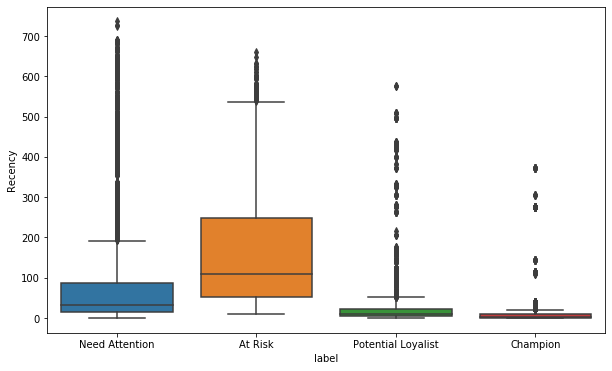

In [50]:
fig, ax = plt.subplots(figsize=(10,6));
sns.boxplot(x='label', y = 'Recency', data = RFM_scores)
plt.show()

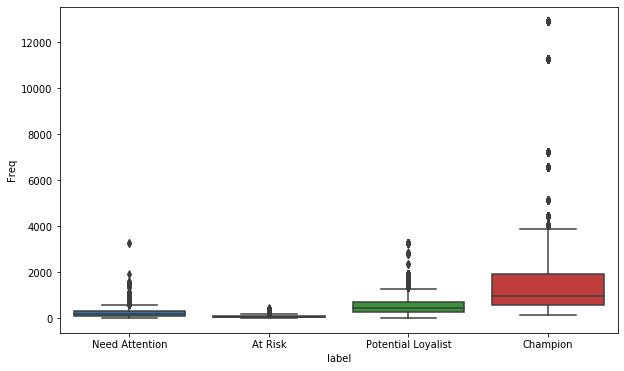

In [51]:
fig, ax = plt.subplots(figsize=(10,6));
sns.boxplot(x='label', y = 'Freq', data = RFM_scores)
plt.show()

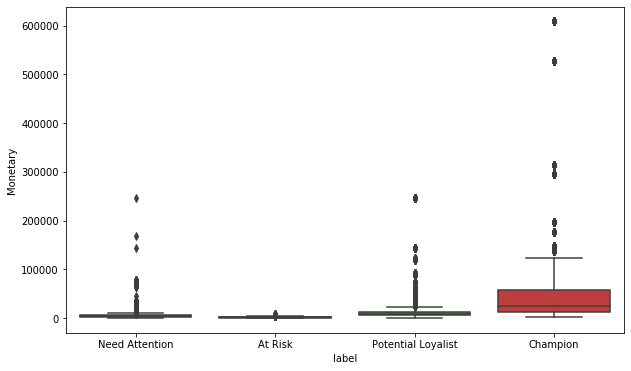

In [52]:
fig, ax = plt.subplots(figsize=(10,6));
sns.boxplot(x='label', y = 'Monetary', data = RFM_scores)
plt.show()